#####  Project Group 35

# Classifying the Presence or Absence of the European Tree Frog due to  Environmental Factors in Poland


## Introduction

The European Tree Frog (*Hyla arborea*) is a common amphibian species found throughout Europe, including Poland. The presence or absence of amphibian species, including the European Tree Frog, have been limited by several environmental factors: the number and type of water reservoirs, the use of each water reservoir, the presence of vegetation and fishing, and how well maintained the water reservoirs are.

**Question:** The question we will attempt to answer with our project is: can we use environmental factors to predict the presence or absence of tree frogs in a given area?

**Dataset:** The dataset that will be used to answer the aforementioned question is titled amphibians.csv, and was taken from the UCI Machine Learning Repository. The data was originally gathered from an environmental impact assessement in Poland for the preparation of two upcoming road projects.

## Preliminary Exploratory Data Analysis

Below we demonstrate that the full data set can be read into R.

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

In [3]:
amphibians <- read_delim("data/amphibians.csv", delim = ";", skip = 2, , col_names = c("ID",'Motorway','SR','NR','TR','VR','SUR1','SUR2','SUR3','UR','FR','OR','RR','BR','MR','CR','Green_frogs','Brown_frogs','Common_toad','Fire-bellied_toad','Tree_frog','Common_newt','Great_crested_newt'))

Parsed with column specification:
cols(
  .default = col_double(),
  Motorway = col_character()
)

See spec(...) for full column specifications.



In [4]:
head(amphibians)

ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,⋯,BR,MR,CR,Green_frogs,Brown_frogs,Common_toad,Fire-bellied_toad,Tree_frog,Common_newt,Great_crested_newt
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1,600,1,1,4,6,2,10,0,⋯,0,0,1,0,0,0,0,0,0,0
2,A1,700,1,5,1,10,6,10,3,⋯,1,0,1,0,1,1,0,0,1,0
3,A1,200,1,5,1,10,6,10,3,⋯,1,0,1,0,1,1,0,0,1,0
4,A1,300,1,5,0,6,10,2,3,⋯,0,0,1,0,0,1,0,0,0,0
5,A1,600,2,1,4,10,2,6,0,⋯,5,0,1,0,1,1,1,0,1,1
6,A1,200,1,5,1,6,6,10,1,⋯,0,0,1,0,0,0,0,0,0,0


In [5]:
tail(amphibians)

ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,⋯,BR,MR,CR,Green_frogs,Brown_frogs,Common_toad,Fire-bellied_toad,Tree_frog,Common_newt,Great_crested_newt
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184,S52,4000,1,12,4,2,6,10,0,⋯,1,0,1,0,1,1,0,0,0,0
185,S52,2300,1,12,3,2,2,1,0,⋯,1,0,1,0,1,0,0,0,0,0
186,S52,300,1,14,2,7,10,2,0,⋯,5,0,1,1,1,1,1,0,1,0
187,S52,500,1,1,4,1,10,2,0,⋯,5,0,1,1,1,1,1,0,1,0
188,S52,300,1,12,3,2,1,6,0,⋯,0,0,1,0,1,1,0,0,0,0
189,S52,300,1,12,3,2,6,10,0,⋯,1,0,1,0,1,1,0,0,0,0


In [6]:
glimpse(amphibians)

Rows: 189
Columns: 23
$ ID                  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Motorway            <chr> "A1", "A1", "A1", "A1", "A1", "A1", "A1", "A1", "…
$ SR                  <dbl> 600, 700, 200, 300, 600, 200, 500, 700, 750, 200,…
$ NR                  <dbl> 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1…
$ TR                  <dbl> 1, 5, 5, 5, 1, 5, 5, 5, 5, 12, 1, 14, 1, 1, 1, 1,…
$ VR                  <dbl> 4, 1, 1, 0, 4, 1, 0, 2, 1, 4, 4, 2, 1, 1, 3, 3, 4…
$ SUR1                <dbl> 6, 10, 10, 6, 10, 6, 6, 10, 6, 2, 2, 1, 2, 2, 2, …
$ SUR2                <dbl> 2, 6, 6, 10, 2, 6, 6, 6, 1, 7, 7, 2, 6, 6, 10, 1,…
$ SUR3                <dbl> 10, 10, 10, 2, 6, 10, 10, 9, 2, 6, 1, 7, 10, 10, …
$ UR                  <dbl> 0, 3, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0…
$ FR                  <dbl> 0, 1, 4, 4, 0, 0, 2, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0…
$ OR                  <dbl> 50, 75, 75, 25, 99, 50, 25, 100, 50, 75, 100, 100…
$ RR                  <dbl> 0,

In [7]:
amphibians_selected <- select(amphibians, NR, TR, UR, VR, FR, MR, Tree_frog) %>%
                        mutate(Tree_frog = as_factor(Tree_frog))
head(amphibians_selected)

NR,TR,UR,VR,FR,MR,Tree_frog
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,4,0,0,0
1,5,3,1,1,0,0
1,5,3,1,4,0,0
1,5,3,0,4,0,0
2,1,0,4,0,0,0
1,5,1,1,0,0,0


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



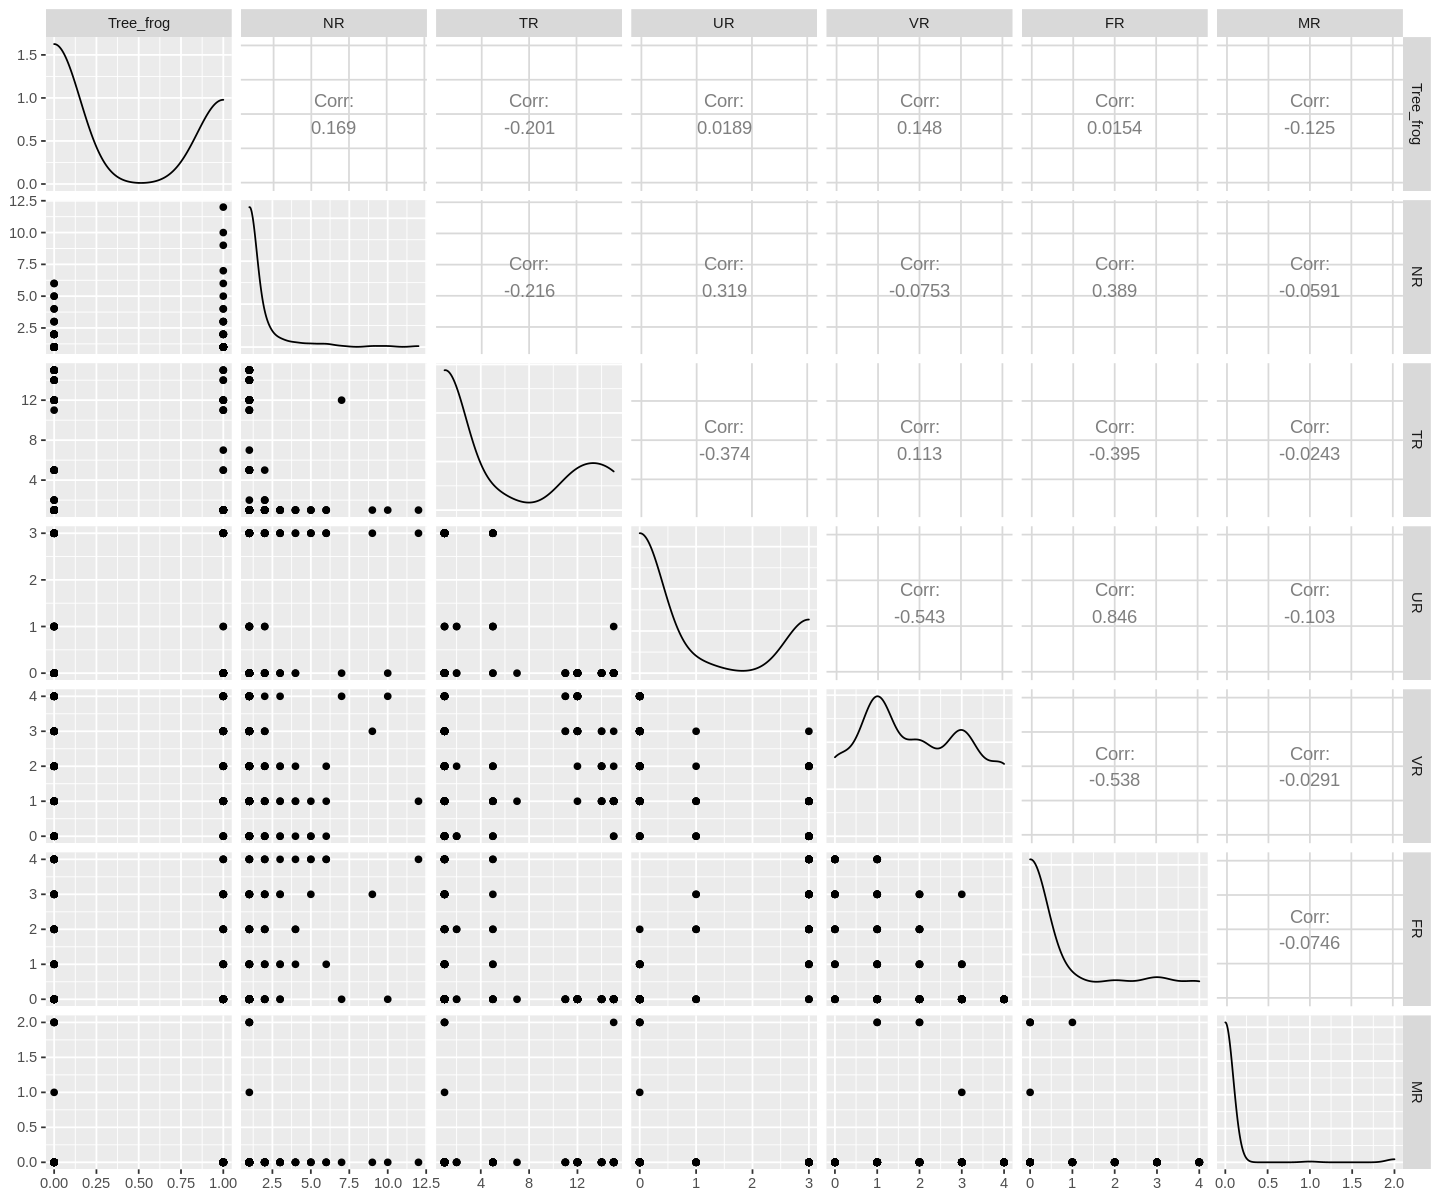

In [8]:
library(GGally)
options(repr.plot.width = 12, repr.plot.height = 10)
plot_pairs <- amphibians %>% 
  select(Tree_frog, NR, TR, UR, VR, FR, MR) %>% 
  ggpairs()
plot_pairs

In [21]:
amphibians_selected <- select(amphibians, NR, TR, UR, VR, MR, Tree_frog) %>%
                        mutate(Tree_frog = as_factor(Tree_frog))
head(amphibians_selected)

NR,TR,UR,VR,MR,Tree_frog
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,4,0,0
1,5,3,1,0,0
1,5,3,1,0,0
1,5,3,0,0,0
2,1,0,4,0,0
1,5,1,1,0,0


In [22]:
set.seed(1)
amphibians_split <- initial_split(amphibians_selected, prop = 0.70, strata = Tree_frog)
amphibians_training <- training(amphibians_split)
amphibians_testing <- testing(amphibians_split)
amphibians_vfold <- vfold_cv(amphibians_training, v = 5, strata = Tree_frog)

amphibians_recipe <- recipe(Tree_frog ~ ., data = amphibians_training) %>%
                        step_scale(all_predictors()) %>%
                        step_scale(all_predictors())

amphibians_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")

gridvals <- tibble(neighbors = seq(1,20))

amphibians_results <- workflow() %>%
                        add_recipe(amphibians_recipe) %>%
                        add_model(amphibians_spec) %>%
                        tune_grid(resamples = amphibians_vfold, gridvals) %>%
                        collect_metrics()
amphibians_results

Warning message:
“The `...` are not used in this function but one or more objects were passed: ''”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6396011,5,0.02860376,Model01
2,roc_auc,binary,0.6197794,5,0.04482044,Model01
3,accuracy,binary,0.6327635,5,0.03936988,Model02
3,roc_auc,binary,0.6005147,5,0.04810864,Model02
5,accuracy,binary,0.6250712,5,0.03059994,Model03
5,roc_auc,binary,0.6087132,5,0.03717772,Model03
6,accuracy,binary,0.6019943,5,0.02357797,Model04
6,roc_auc,binary,0.5744485,5,0.03837582,Model04
8,accuracy,binary,0.5945869,5,0.04971816,Model05


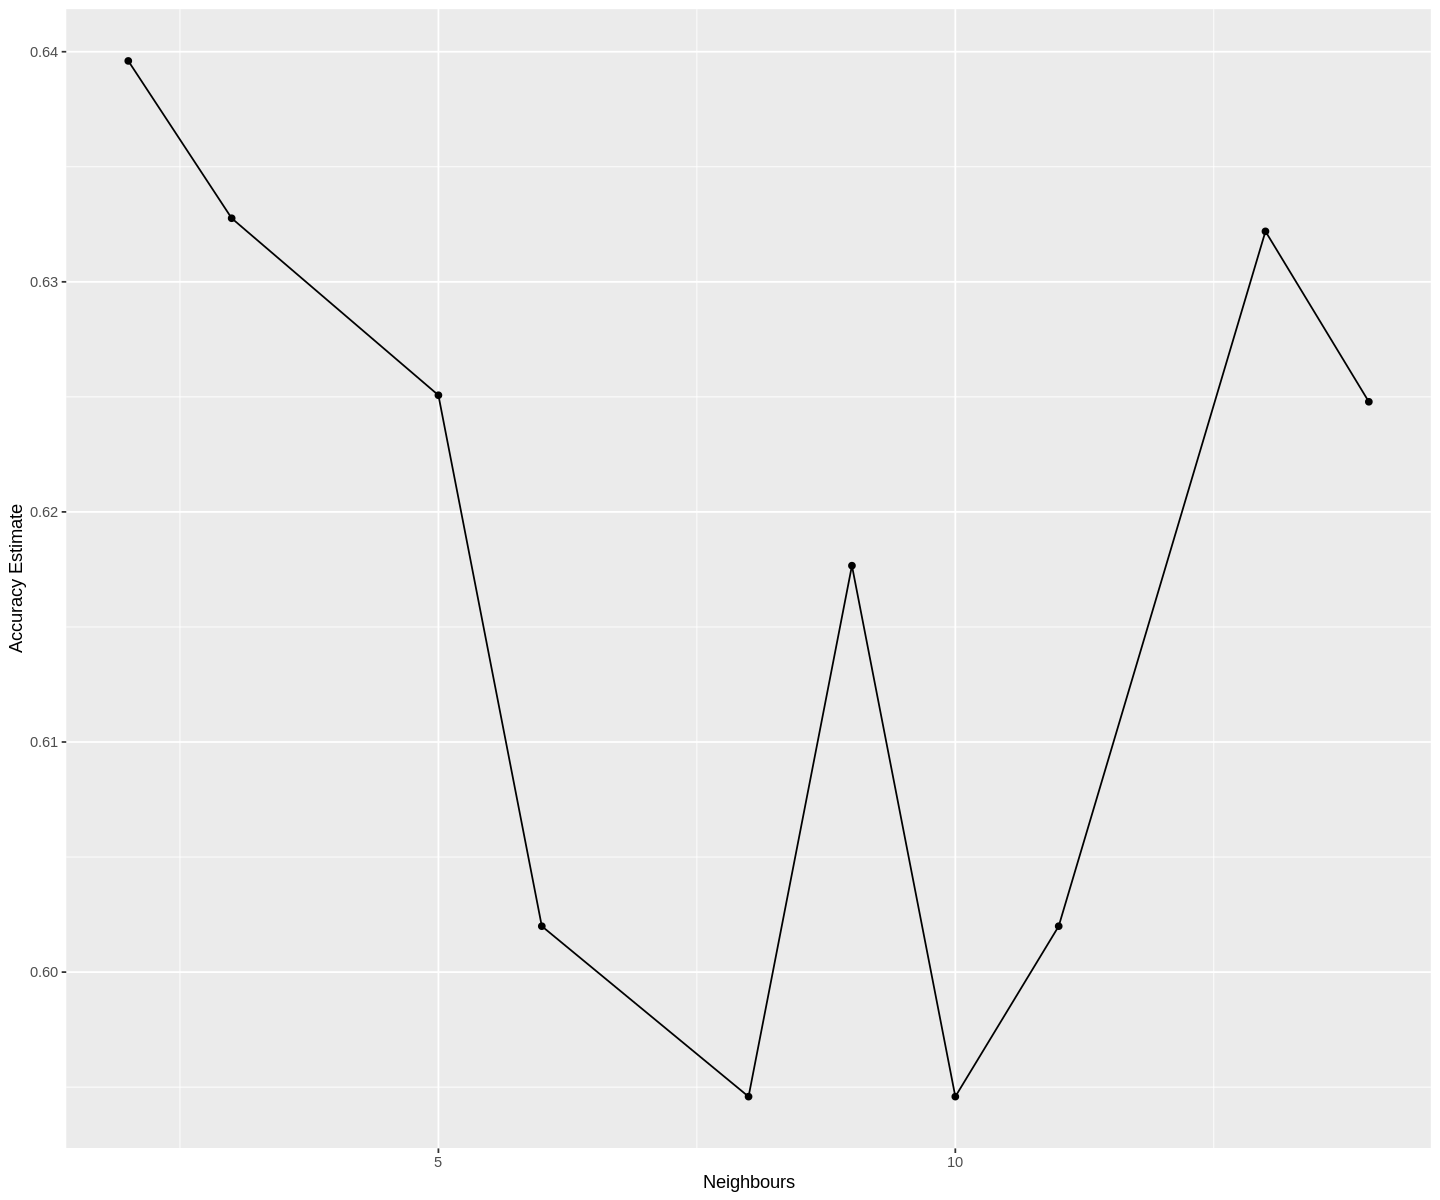

In [23]:
accuracies = amphibians_results %>%
                filter(.metric == "accuracy")

accuracy_vs_K <- ggplot(accuracies, aes(x = neighbors, y = mean)) + 
                    geom_point() +
                    geom_line() +
                    labs(x = 'Neighbours', y = 'Accuracy Estimate')
accuracy_vs_K

In [24]:
k_max <- amphibians_results %>%
                    filter(.metric == "accuracy") %>%
                    filter(mean == max(mean)) %>%
                    select(neighbors) %>%
                    pull()

amphibians_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")

#not sure if the set.seed is needed here
amphibians_fit <- workflow() %>%
                        add_recipe(amphibians_recipe) %>%
                        add_model(amphibians_spec_2) %>%
                        fit(data = amphibians_training) 
amphibians_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~k_max,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3533835
Best kernel: rectangular
Best k: 2

In [25]:
amphibians_test_predictions <- predict(amphibians_fit, amphibians_testing) %>% 
                                bind_cols(amphibians_testing) %>%
                                metrics(truth = Tree_frog, estimate = .pred_class)
head(amphibians_test_predictions)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6607143
kap,binary,0.1914894


In [26]:
amphibians_test_predictions_matrix <- predict(amphibians_fit, amphibians_testing) %>% 
                                bind_cols(amphibians_testing) %>%
                                conf_mat(truth = Tree_frog, estimate = .pred_class)
head(amphibians_test_predictions_matrix)

$table
          Truth
Prediction  0  1
         0 31 15
         1  4  6

$dots
list()
